170498071/170498071 [==============================] - 11s 0us/step
Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5470 - accuracy: 0.4338 - val_loss: 1.2663 - val_accuracy: 0.5475
Epoch 2/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1778 - accuracy: 0.5789 - val_loss: 1.0808 - val_accuracy: 0.6152
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0293 - accuracy: 0.6371 - val_loss: 1.0363 - val_accuracy: 0.6313
Epoch 4/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9338 - accuracy: 0.6732 - val_loss: 0.9730 - val_accuracy: 0.6598
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8587 - accuracy: 0.7005 - val_loss: 0.9436 - val_accuracy: 0.6753
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8000 - accuracy: 0.7199 - val_loss: 0.8836 - val_accuracy: 0.6986
Epoch 7/10
1563/1563 [==============================] - 

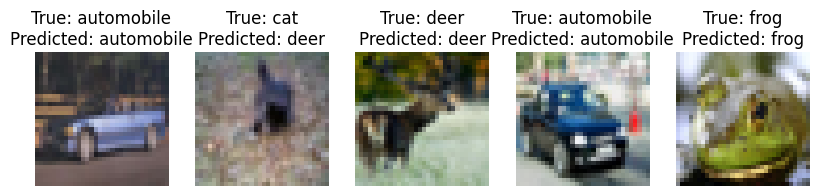

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoded vectors
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Generate sample images with their predicted labels
sample_indexes = np.random.choice(len(test_images), 5)
sample_images = test_images[sample_indexes]
sample_labels = test_labels[sample_indexes]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title("True: %s\nPredicted: %s" % (class_names[np.argmax(sample_labels[i])], class_names[predicted_labels[i]]))
    plt.axis('off')
plt.show()